# Dataset & Import Libraries

### Import Libraries &  Load Dataset

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [108]:
pd.set_option('display.max_rows',20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width',2000)

In [109]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3081,6376-GAHQE,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,77.85,299.2,Yes
5532,8174-LNWMW,Female,0,No,No,31,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.90,689.35,No
777,7314-OXENN,Male,0,No,No,2,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,82.00,184.65,Yes


# Preprocessing & Data Cleaning For Data Analysis

In [110]:
len(df.columns)

21

In [111]:
df.rename(columns={
     'customerID' : 'cust_id',
     'SeniorCitizen' : 'senior_citizen',
     'Partner' : 'partner',
     'Dependents' : 'dependents',
     'PhoneService' : 'phone_service',
     'MultipleLines' : 'multiple_lines',
     'InternetService' : 'internet_service',
     'OnlineSecurity' : 'online_security',
     'OnlineBackup' : 'online_backup',
     'DeviceProtection' : 'device_protection',
     'TechSupport' : 'tech_support',
     'StreamingTV' :'streaming_tv',
     'StreamingMovies' : 'streaming_movies',
     'Contract' : 'contract',
     'PaperlessBilling' : 'paperless_billing',
     'PaymentMethod' : 'payment_method',
     'MonthlyCharges' : 'monthly_charges',
     'TotalCharges' : 'total_charges',
     'Churn' : 'churn'
}, inplace=True)
df.columns

Index(['cust_id', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'churn'], dtype='object')

#### Change Total Charges to Float

In [112]:
df['total_charges'] = df['total_charges'].replace(' ', np.nan).astype(float)

#### Payment Method Check

In [113]:
df['payment_method'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [114]:
df['payment_method'] = df['payment_method'].str.replace(' (automatic)', '', regex=False)
df['payment_method'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

#### Remove Customer ID

In [10]:
df.drop(columns='cust_id', inplace=True)

### Handleing Missing values

In [11]:
value = np.nan
df[['total_charges', 'tenure']].isin([value]).any()

total_charges     True
tenure           False
dtype: bool

In [12]:
missing_value = [value for value in df.columns if df[value].isna().sum() > 1]
for value in missing_value:
     print(f'{value}, {round(df[value].isna().mean(), 4)} % Missing values.')

total_charges, 0.0016 % Missing values.


In [13]:
df['total_charges'].fillna(df['total_charges'].mean(), inplace=True)

In [14]:
df.sample()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
5291,Female,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,One year,No,Credit card (automatic),86.45,5762.95,No


### Average Monthly Spend

In [15]:
df['average_monthly_spend'] = df['total_charges'] / df['tenure']
df['average_monthly_spend'].fillna({'tenure' : 0}, inplace=True)

In [17]:
df.sample(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,average_monthly_spend
5806,Female,0,No,Yes,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.6,35.85,Yes,17.9250
4480,Female,0,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,69.4,69.40,Yes,69.4000
1401,Female,1,No,No,4,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card,99.8,442.85,Yes,110.7125


### Divided Columns into 2-Types : Numerical & Categorical

In [18]:
numerical_columns = [var for var in df.columns if df[var].dtype !='O']
categorical_columns = [var for var in df.columns if df[var].dtype =='O']

In [19]:
numerical_columns

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'average_monthly_spend']

In [20]:
categorical_columns

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract',
 'paperless_billing',
 'payment_method',
 'churn']

# Exploratory Data Analysis

In [21]:
df.shape, df.size

((7043, 21), 147903)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   internet_service       7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  contract               7043 non-null   object 
 15  pape

#### Statistical Analysis for Numerical Columns

In [23]:
df.describe(percentiles=[.2, .4, .6, .8])

e:\VSCode_2023\Programming\DataAnalysis\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,senior_citizen,tenure,monthly_charges,total_charges,average_monthly_spend
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,inf
std,0.368612,24.559481,30.090047,2265.000258,NaN
min,0.000000,0.000000,18.250000,18.800000,13.775000
20%,0.000000,6.000000,25.050000,267.370000,25.237273
40%,0.000000,20.000000,58.830000,947.380000,58.772500
50%,0.000000,29.000000,70.350000,1400.550000,70.450000
60%,0.000000,40.000000,79.100000,2065.520000,78.594931
80%,0.000000,60.000000,94.250000,4471.440000,94.056923
max,1.000000,72.000000,118.750000,8684.800000,inf


#### Statistical Analysis for Categorical Columns

In [24]:
df.describe(percentiles=[.2, .4, .6, .8], include=['O'])

,gender,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### Churn vs Online Support  

In [25]:
features = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
churn_rate_by_features = df.groupby(features)['churn'].value_counts(normalize=True).unstack().fillna(0) * 100
churn_rate_by_features

churn                                                                                              No        Yes
online_security online_backup device_protection tech_support streaming_tv streaming_movies                      
No              No            No                No           No           No                47.763348  52.236652
                                                                          Yes               35.135135  64.864865
                                                             Yes          No                38.596491  61.403509
                                                                          Yes               39.908257  60.091743
                                                Yes          No           No                73.529412  26.470588
...                                                                                               ...        ...
Yes             Yes           Yes               No           Yes          Yes               85.869565  14.130435
                                                Yes          No           No                95.454545   4.545455
                                                                          Yes               93.650794   6.349206
                                                             Yes          No                94.736842   5.263158
                                                                          Yes               94.718310   5.281690

[65 rows x 2 columns]

<Figure size 1400x800 with 0 Axes>

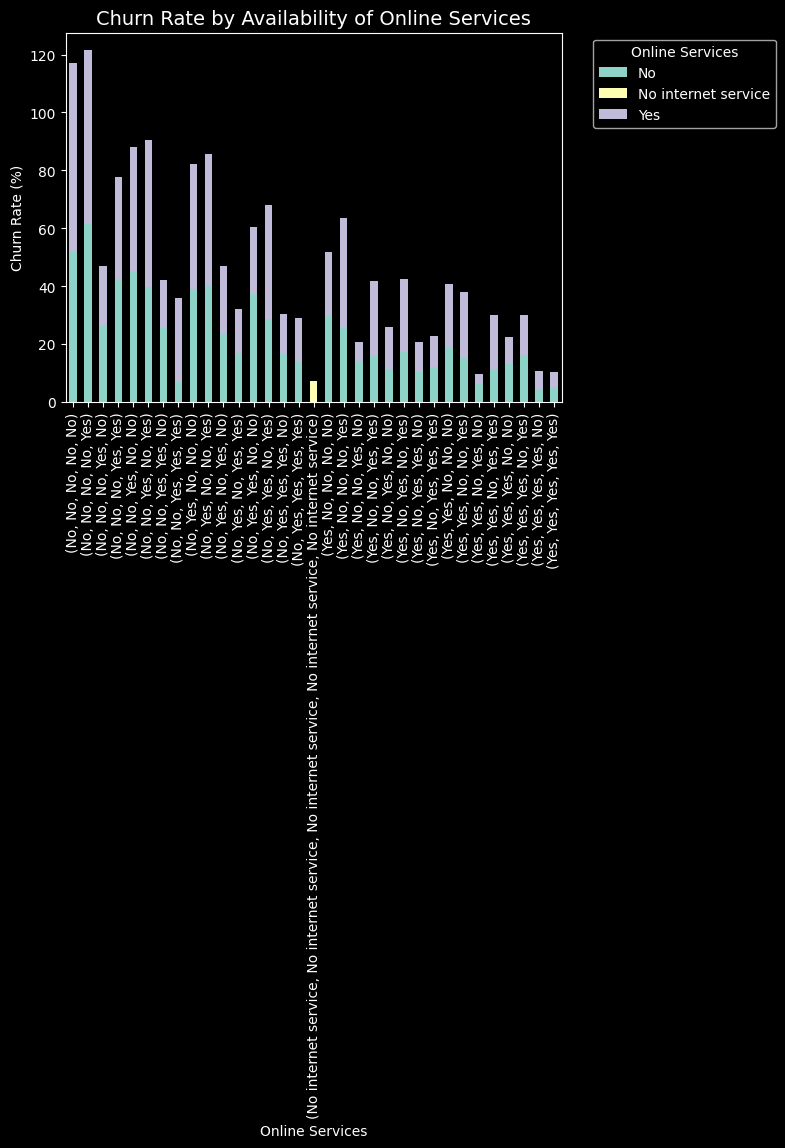

In [26]:
plt.figure(figsize=(14, 8))
churn_rate_by_features['Yes'].unstack().plot(kind='bar', stacked=True)
plt.title('Churn Rate by Availability of Online Services', fontsize=14)
plt.xlabel('Online Services')
plt.ylabel('Churn Rate (%)')
plt.legend(title='Online Services', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Conclusion for analysis of churn rate by availability of online services:

1. **Online Security**:
     - Customers without online security have a significantly higher churn rate compared to those with online security.
     - The churn rate is highest for customers who do not have any of the online support features.

2. **Online Backup**:
     - Similar to online security, customers without online backup also have a higher churn rate.
     - The presence of online backup reduces the churn rate, especially when combined with other online support features.

3. **Device Protection**:
     - Customers without device protection have a higher churn rate compared to those with device protection.
     - The churn rate decreases as more online support features are added.

4. **Tech Support**:
     - The availability of tech support significantly reduces the churn rate.
     - Customers with tech support and other online support features have the lowest churn rates.

5. **Streaming TV and Movies**:
     - Customers without streaming TV and movies services have a higher churn rate.
     - The presence of these services, especially when combined with other online support features, reduces the churn rate.

##### Overall Observations:
- The presence of online support features such as online security, online backup, device protection, tech support, streaming TV, and streaming movies is associated with lower churn rates.
- Customers who do not have any of these online support features are at a higher risk of churning.
- These insights suggest that offering and promoting online support features can help in reducing customer churn and improving retention.

These observations can help in identifying high-risk customers and developing strategies to improve customer retention by offering and promoting online support features.

### Analyse Churn Rates By Contract Type

                       mean    min      max          std
contract                                                
Month-to-month  1369.254581  18.85  8061.50  1613.879008
One year        3034.172981  18.80  8684.80  2229.058541
Two year        3720.405135  20.35  8672.45  2566.043070


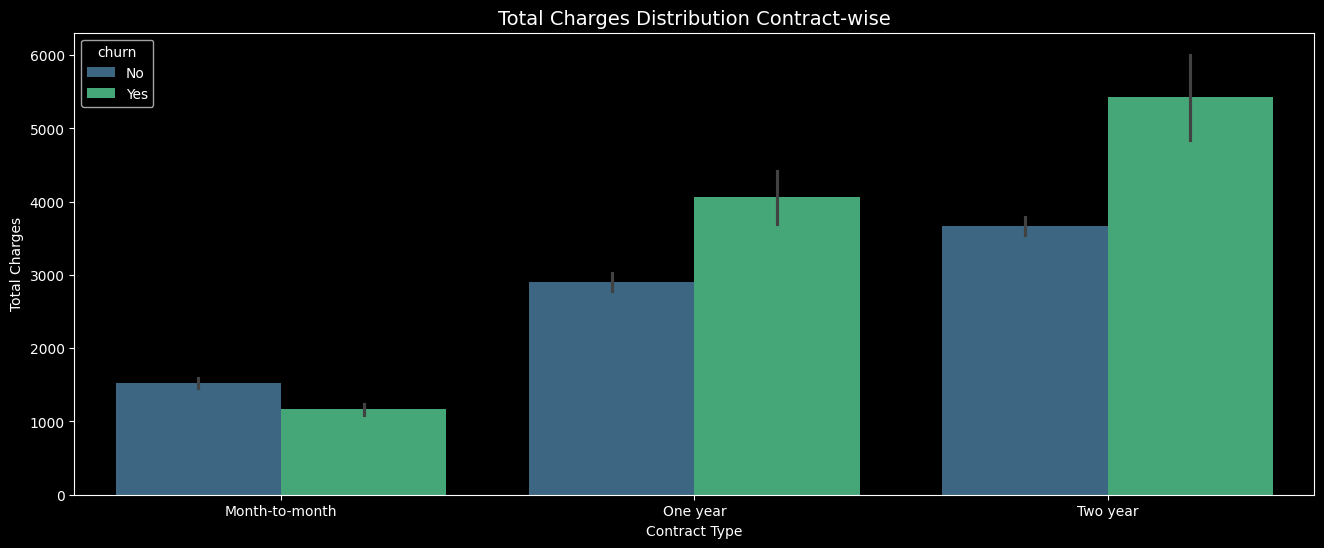

In [27]:
churn_stats_by_contract = df.groupby('contract')['total_charges'].agg(['mean', 'min', 'max', 'std'])
print(churn_stats_by_contract)

# Plot average monthly spend by contract type
plt.figure(figsize=(16, 6))
sns.barplot(x='contract', y='total_charges', data=df, hue='churn', palette='viridis')
plt.title('Total Charges Distribution Contract-wise', fontsize=14)
plt.xlabel('Contract Type')
plt.ylabel('Total Charges')
plt.show()

##### Conclusion for Total Charges by Contract Type

The analysis of total charges by contract type reveals the following insights:

1. **Statistical Summary**:
     - The mean total charges increase with the length of the contract. Customers with month-to-month contracts have the lowest mean total charges, while those with two-year contracts have the highest mean total charges.
     - The standard deviation of total charges also increases with the length of the contract, indicating more variability in total charges among customers with longer contracts.

2. **Visualization**:
     - The bar plot of total charges by contract type shows that customers with longer contracts tend to have higher total charges.
     - The distribution of total charges for month-to-month customers is more concentrated around lower values, while for one-year and two-year customers, it is more spread out with higher values.

##### Overall Observations:
- Customers with longer contracts tend to accumulate higher total charges, possibly due to longer tenures and consistent monthly charges.
- The variability in total charges among customers with longer contracts suggests that there are different usage patterns or plans within these groups.

These insights can help in understanding the differences in customer behavior based on the type of contract and identifying potential areas for improving customer satisfaction and retention.

### Analyse Churn Rates By Internet-Service Type

                         mean    min          max          std
internet_service                                              
DSL               2120.126953  23.45  6859.050000  1878.240583
Fiber optic       3205.304570  68.50  8684.800000  2570.220105
No                 671.582374  18.80  2283.300441   563.248155


Text(0.5, 1.0, 'Total Charge Distribution Internet-Service-wise')

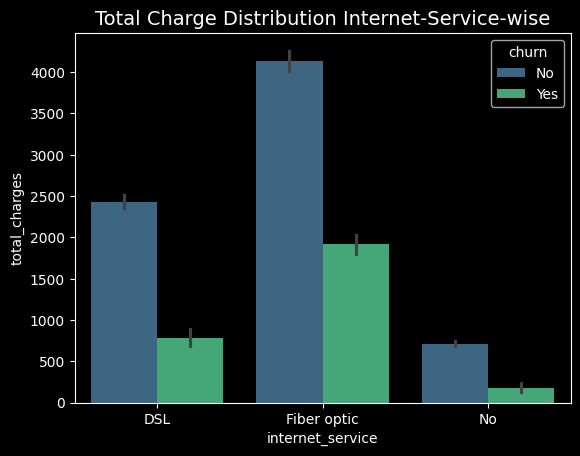

In [28]:
# Statistical calculations for total charges by internet service type
churn_stats_by_internet_service = df.groupby('internet_service')['total_charges'].agg(['mean', 'min', 'max', 'std'])
print(churn_stats_by_internet_service)

# Plot total charges by internet service type
sns.barplot(x='internet_service', y='total_charges', data=df, palette='viridis', hue='churn')
plt.title('Total Charge Distribution Internet-Service-wise', fontsize=14)

##### Conclusion for Total Charges by Internet Service Type

The analysis of total charges by internet service type reveals the following insights:

1. **Statistical Summary**:
     - The mean total charges for customers with DSL internet service is lower compared to those with Fiber optic service.
     - The standard deviation of total charges for Fiber optic customers is higher, indicating more variability in total charges among these customers.

2. **Visualization**:
     - The bar plot of total charges by internet service type shows that customers with Fiber optic service tend to have higher total charges compared to those with DSL service.
     - The distribution of total charges for Fiber optic customers is more spread out, while for DSL customers, it is more concentrated around lower values.

##### Overall Observations:
- Customers with Fiber optic service tend to accumulate higher total charges, possibly due to higher monthly charges or longer tenures.
- The variability in total charges among Fiber optic customers suggests that there are different usage patterns or plans within this group.

These insights can help in understanding the differences in customer behavior based on the type of internet service and identifying potential areas for improving customer satisfaction and retention.

### Analyse Churn Rates By Monthly-charges

            mean    min     max        std
churn                                     
No     61.265124  18.25  118.75  31.092648
Yes    74.441332  18.85  118.35  24.666053


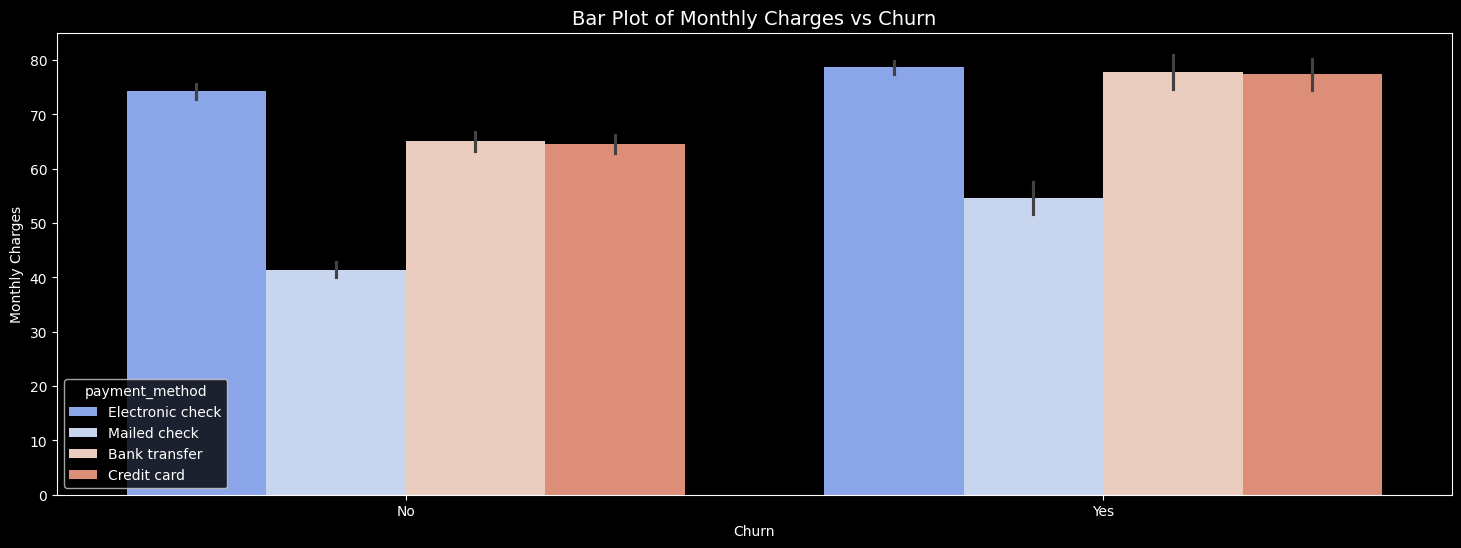

In [29]:
# Statistical calculations for churn by internet service type
churn_stats_by_internet_service = df.groupby('churn')['monthly_charges'].agg(['mean', 'min', 'max', 'std'])
print(churn_stats_by_internet_service)

plt.figure(figsize=(18, 6))
sns.barplot(x='churn', y='monthly_charges', data=df, hue='payment_method', palette='coolwarm')
plt.title('Bar Plot of Monthly Charges vs Churn', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

##### Conclusion for Monthly Charges vs Churn

The analysis of monthly charges vs churn reveals the following insights:

1. **Statistical Summary**:
     - The mean monthly charges for customers who churned is higher compared to those who did not churn.
     - The standard deviation of monthly charges for churned customers is lower, indicating that the monthly charges for churned customers are more consistent.

2. **Visualization**:
     - The bar plot of monthly charges vs churn shows that customers with higher monthly charges are more likely to churn.
     - The distribution of monthly charges for churned customers is more concentrated around higher values, while for non-churned customers, it is more spread out.

##### Overall Observations:
- Customers with higher monthly charges are at a higher risk of churning. This could be due to dissatisfaction with the value they are receiving for the cost.
- The consistency in monthly charges for churned customers suggests that they might be on specific plans or have usage patterns that lead to higher charges.

These insights can help in identifying high-risk customers and developing strategies to reduce churn, such as offering discounts or value-added services to customers with higher monthly charges.

### Customer Tenure vs Total Charges

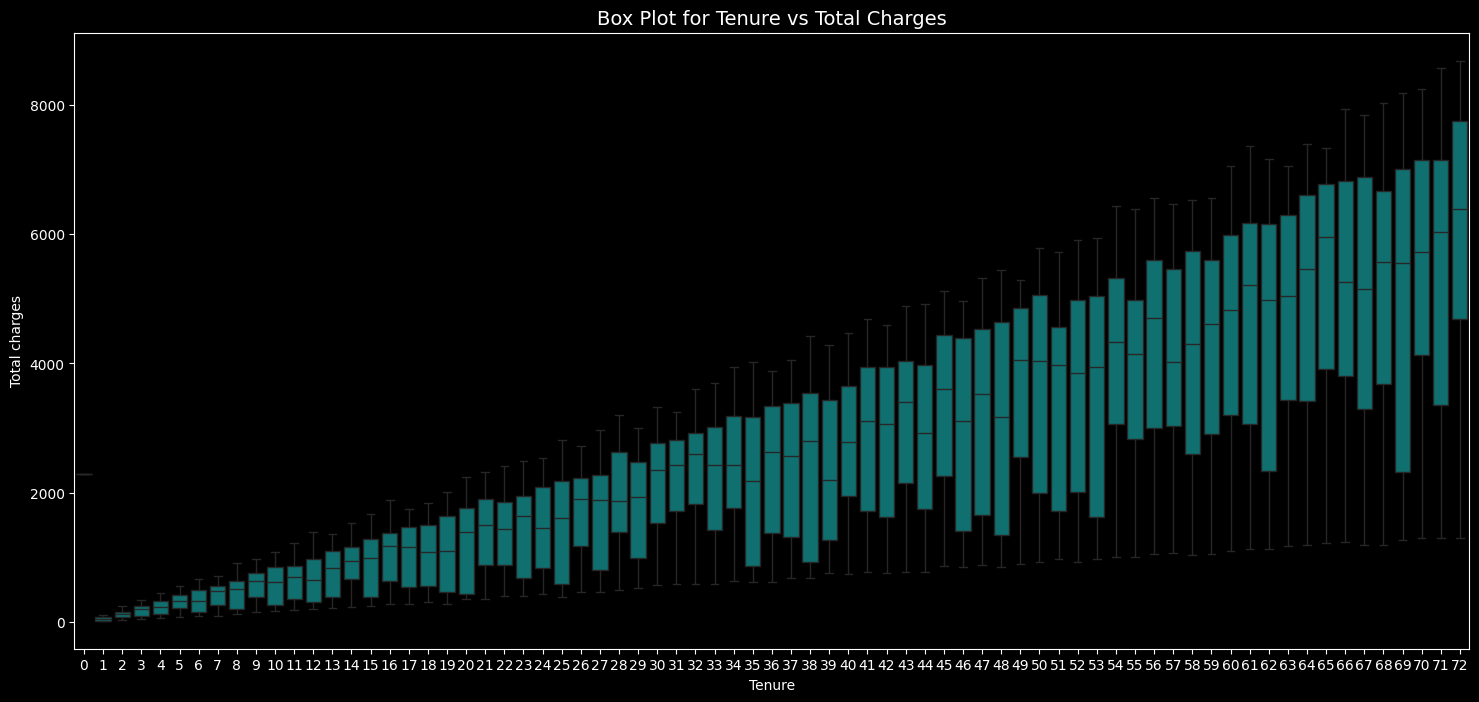

In [30]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='tenure', y='total_charges', data=df, color='#008080')
plt.title('Box Plot for Tenure vs Total Charges', fontsize=14)
plt.xlabel('Tenure')
plt.ylabel('Total charges')
plt.show()

##### Conclusion for Tenure vs Total Charges

The box plot for tenure vs total charges indicates that customers with longer tenures tend to have higher total charges. This is expected as customers who stay longer accumulate more charges over time. However, there are significant outliers, suggesting that some customers with shorter tenures also have high total charges, possibly due to higher monthly charges or other factors.

### Customer Accounts Information Analysis for Numerical variables

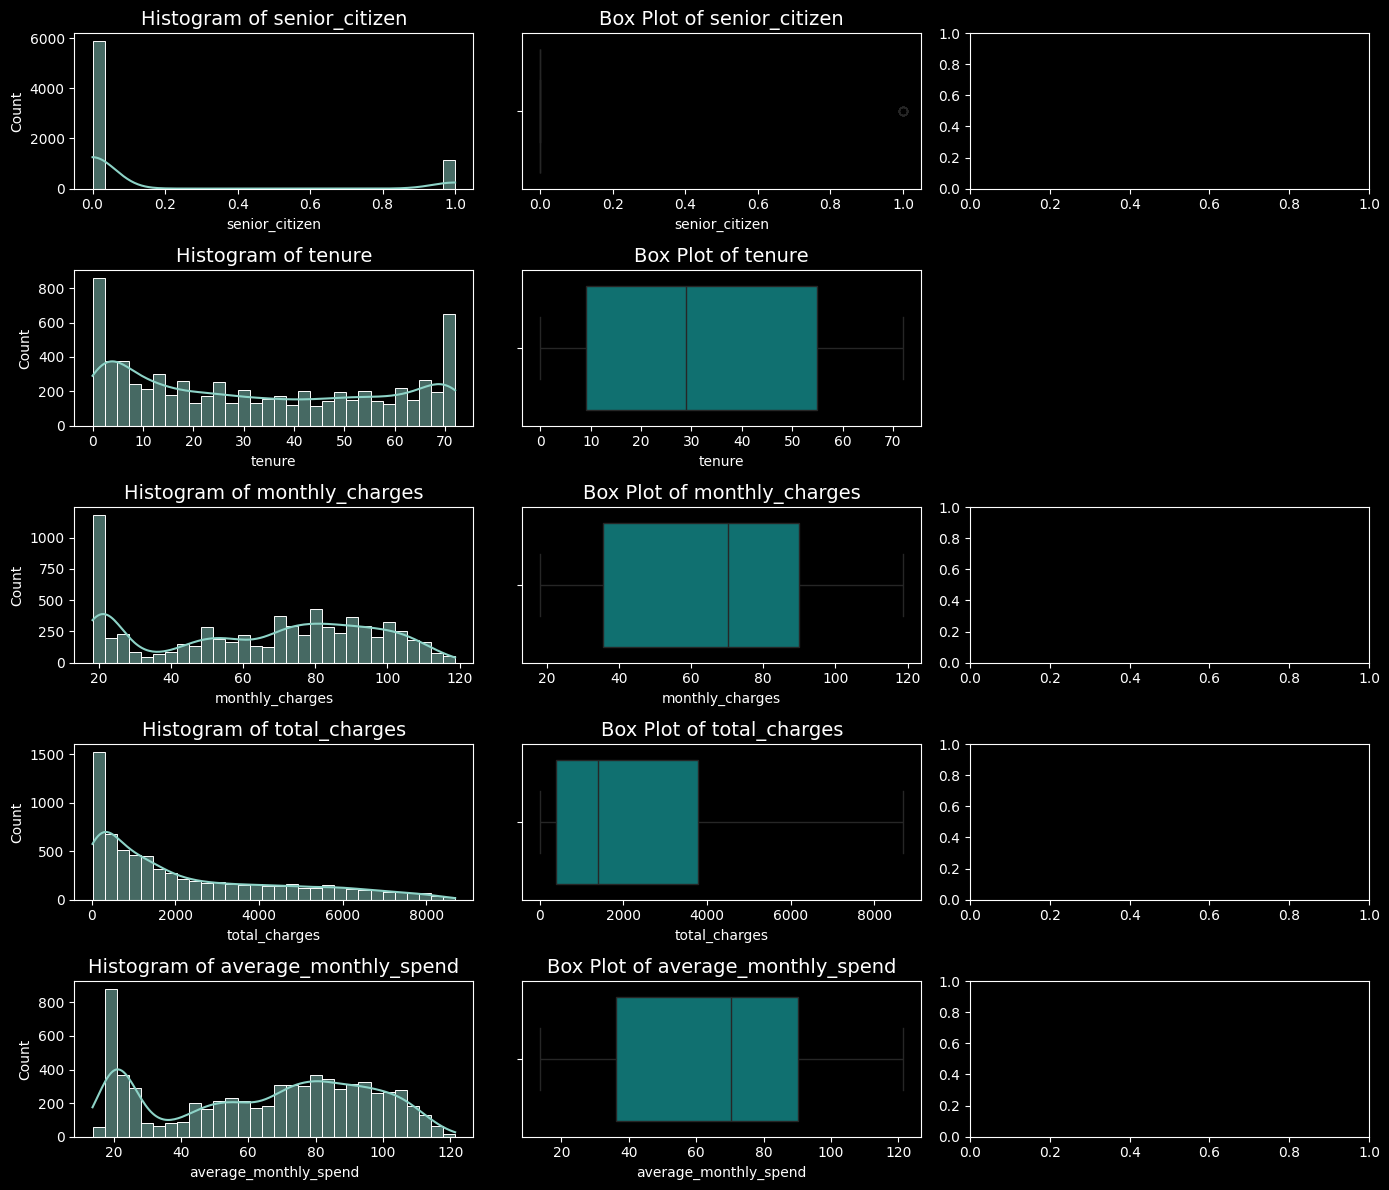

In [31]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(14, 12))

for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {column}', fontsize=14)
    sns.boxplot(x=df[column], ax=axes[i, 1], color='#008080')
    axes[i, 1].set_title(f'Box Plot of {column}', fontsize=14)

# Hide the unused subplots
for j in range(len(numerical_columns), 3 * 2):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

##### Conclusion from Histogram and Box Plot Analysis

1. **Senior Citizen**:
     - **Histogram**: The distribution of senior citizens is highly skewed, with a majority of customers being non-senior citizens.
     - **Box Plot**: The box plot shows a binary distribution with no outliers, indicating that the data is clean and well-defined.

2. **Tenure**:
     - **Histogram**: The distribution of tenure appears to be right-skewed, indicating that a majority of customers have shorter tenures.
     - **Box Plot**: The box plot shows a wide range of tenure values with some outliers. The median tenure is relatively low, suggesting that many customers do not stay for long periods.

3. **Monthly Charges**:
     - **Histogram**: The distribution of monthly charges is somewhat uniform with a slight right skew. This indicates that there is a wide range of monthly charges, but most customers are clustered around the lower to mid-range values.
     - **Box Plot**: The box plot shows a few outliers with very high monthly charges. The interquartile range (IQR) is relatively wide, indicating variability in monthly charges among customers.

4. **Total Charges**:
     - **Histogram**: The distribution of total charges is right-skewed, indicating that most customers have lower total charges, with fewer customers having very high total charges.
     - **Box Plot**: The box plot shows significant outliers with very high total charges. The median total charge is relatively low, and the IQR is wide, indicating variability in total charges among customers.

5. **Average Monthly Spend**:
     - **Histogram**: The distribution of average monthly spend is right-skewed, indicating that most customers have lower average monthly spends, with fewer customers having very high average monthly spends.
     - **Box Plot**: The box plot shows significant outliers with very high average monthly spends. The median average monthly spend is relatively low, and the IQR is wide, indicating variability in average monthly spend among customers.

##### Overall Observations:
- The right-skewed distributions of tenure, total charges, and average monthly spend suggest that many customers do not stay with the service for extended periods and thus accumulate lower total charges and average monthly spends.
- The variability in monthly charges indicates that customers are on different plans or have different usage patterns.
- The presence of outliers in all numerical variables suggests that there are some customers with significantly different behaviors or usage patterns compared to the majority.

These observations can help in understanding customer behavior and identifying potential areas for improving customer retention and satisfaction.

### Customer Demographic Information Analysis for Catagorical variables

In [32]:
# Calculate the overall churn rate
overall_churn_rate = df['churn'].value_counts(normalize=True)['Yes'] * 100
print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")

Overall Churn Rate: 26.54%


In [33]:
# Calculate churn rate by demographic information
demographic_columns = ['gender', 'senior_citizen', 'partner', 'dependents']
churn_rate_by_demographics = df.groupby(demographic_columns)['churn'].value_counts(normalize=True).unstack().fillna(0) * 100

# Display the churn rate
churn_rate_by_demographics['Churn Rate (%)'] = churn_rate_by_demographics['Yes']
churn_rate_by_demographics.drop(columns=['No', 'Yes'], inplace=True)
print(churn_rate_by_demographics)

churn                                     Churn Rate (%)
gender senior_citizen partner dependents                
Female 0              No      No               32.062780
                              Yes              22.535211
                      Yes     No               19.127517
                              Yes              14.691943
       1              No      No               49.842271
                              Yes              33.333333
                      Yes     No               34.928230
                              Yes              20.512821
Male   0              No      No               30.267922
                              Yes              20.379147
                      Yes     No               22.574956
                              Yes              12.773723
       1              No      No               48.360656
                              Yes              20.000000
                      Yes     No               37.366548
                              Y

<Figure size 1400x800 with 0 Axes>

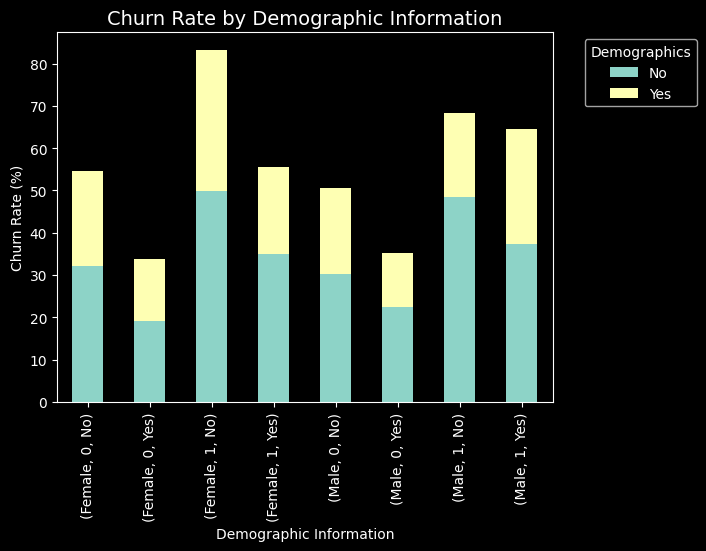

In [34]:
# Visualization for Churn Rate by Demographic Information
plt.figure(figsize=(14, 8))
churn_rate_by_demographics['Churn Rate (%)'].unstack().plot(kind='bar', stacked=True)
plt.title('Churn Rate by Demographic Information', fontsize=14)
plt.xlabel('Demographic Information')
plt.ylabel('Churn Rate (%)')
plt.legend(title='Demographics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



##### Conclusion for Demographic Information Analysis

The analysis of churn rate by demographic information reveals the following insights:

1. **Gender**:
     - Female customers have a slightly higher churn rate compared to male customers.
     - The churn rate for female customers without dependents is higher than those with dependents.

2. **Senior Citizen**:
     - Senior citizens have a significantly higher churn rate compared to non-senior citizens.
     - Among senior citizens, those without dependents have the highest churn rate.

3. **Partner**:
     - Customers without a partner have a higher churn rate compared to those with a partner.
     - This trend is consistent across both senior and non-senior citizens.

4. **Dependents**:
     - Customers without dependents have a higher churn rate compared to those with dependents.
     - This trend is consistent across both genders and senior citizen status.

##### Overall Observations:
- Senior citizens and customers without dependents are at a higher risk of churning.
- Female customers and those without a partner also show higher churn rates.
- These insights can help in identifying high-risk customer segments and developing targeted strategies to improve customer retention, such as offering special discounts or personalized services to senior citizens and customers without dependents.

### Analyse Churn Rate By Customer Tenure

In [35]:
# Create a new column to categorize tenure into bins
df['tenure_bins'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])
df['tenure_bins'].sample(3)

6436    60-72
5090     0-12
2443    60-72
Name: tenure_bins, dtype: category
Categories (6, object): ['0-12' < '12-24' < '24-36' < '36-48' < '48-60' < '60-72']

In [36]:
# Calculate churn rate by tenure bins
churn_rate_by_tenure = df.groupby('tenure_bins')['churn'].value_counts(normalize=True).unstack().fillna(0) * 100
churn_rate_by_tenure

churn,No,Yes
tenure_bins,,
0-12,52.321839,47.678161
12-24,71.289062,28.710938
24-36,78.365385,21.634615
36-48,80.971129,19.028871
48-60,85.576923,14.423077
60-72,93.390192,6.609808


In [37]:
churn_rate_by_tenure['Churn Rate (%)'] = churn_rate_by_tenure['Yes']
churn_rate_by_tenure.drop(columns=['No', 'Yes'], inplace=True)
print(churn_rate_by_tenure)

churn        Churn Rate (%)
tenure_bins                
0-12              47.678161
12-24             28.710938
24-36             21.634615
36-48             19.028871
48-60             14.423077
60-72              6.609808


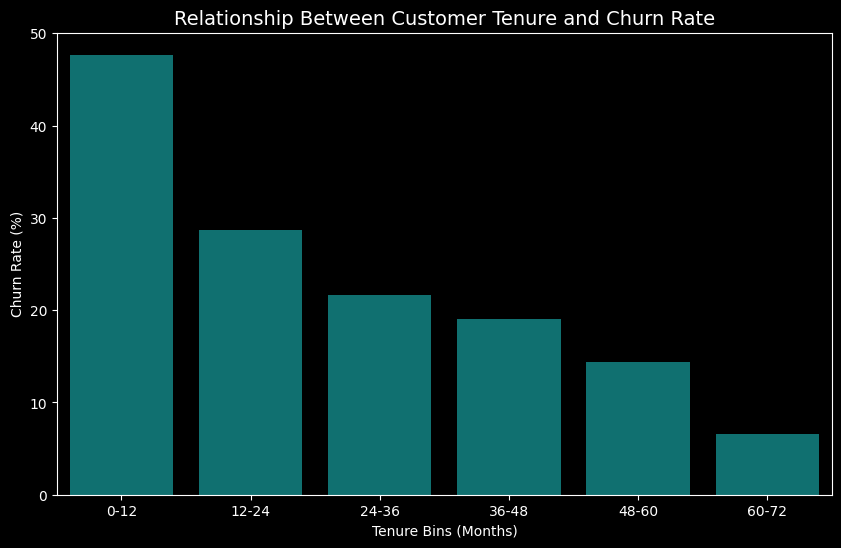

In [38]:
# Plot churn rate by tenure bins
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_tenure.index, y=churn_rate_by_tenure['Churn Rate (%)'], color='teal')
plt.title('Relationship Between Customer Tenure and Churn Rate', fontsize=14)
plt.xlabel('Tenure Bins (Months)')
plt.ylabel('Churn Rate (%)')
plt.show()

##### Conclusion for Tenure vs Churn

The analysis of churn rate by tenure bins reveals the following insights:

1. **0-12 Months**:
     - The churn rate is highest for customers with a tenure of 0-12 months, at approximately 47.68%. This indicates that new customers are more likely to churn within the first year.

2. **12-24 Months**:
     - The churn rate decreases significantly for customers with a tenure of 12-24 months, at approximately 28.71%. This suggests that customers who stay beyond the first year are less likely to churn.

3. **24-36 Months**:
     - The churn rate continues to decrease for customers with a tenure of 24-36 months, at approximately 21.63%. This indicates that the likelihood of churn decreases further as customers stay longer.

4. **36-48 Months**:
     - The churn rate for customers with a tenure of 36-48 months is approximately 19.03%. This shows a continued decrease in churn rate as tenure increases.

5. **48-60 Months**:
     - The churn rate for customers with a tenure of 48-60 months is approximately 14.42%. This indicates that long-term customers are less likely to churn.

6. **60-72 Months**:
     - The churn rate is lowest for customers with a tenure of 60-72 months, at approximately 6.61%. This suggests that customers who stay for five years or more are the least likely to churn.

##### Overall Observations:
- The churn rate decreases as customer tenure increases, indicating that long-term customers are more likely to stay with the service.
- New customers (0-12 months) are at the highest risk of churning, highlighting the importance of focusing on customer retention strategies during the initial period.
- These insights can help in developing targeted retention strategies to reduce churn, especially for new customers, and to maintain long-term customer relationships.

### Correlation Heatmap

                       senior_citizen    tenure  monthly_charges  total_charges  average_monthly_spend
senior_citizen               1.000000  0.016567         0.220173       0.102395               0.217616
tenure                       0.016567  1.000000         0.247900       0.824757               0.246198
monthly_charges              0.220173  0.247900         1.000000       0.650468               0.996237
total_charges                0.102395  0.824757         0.650468       1.000000               0.650915
average_monthly_spend        0.217616  0.246198         0.996237       0.650915               1.000000


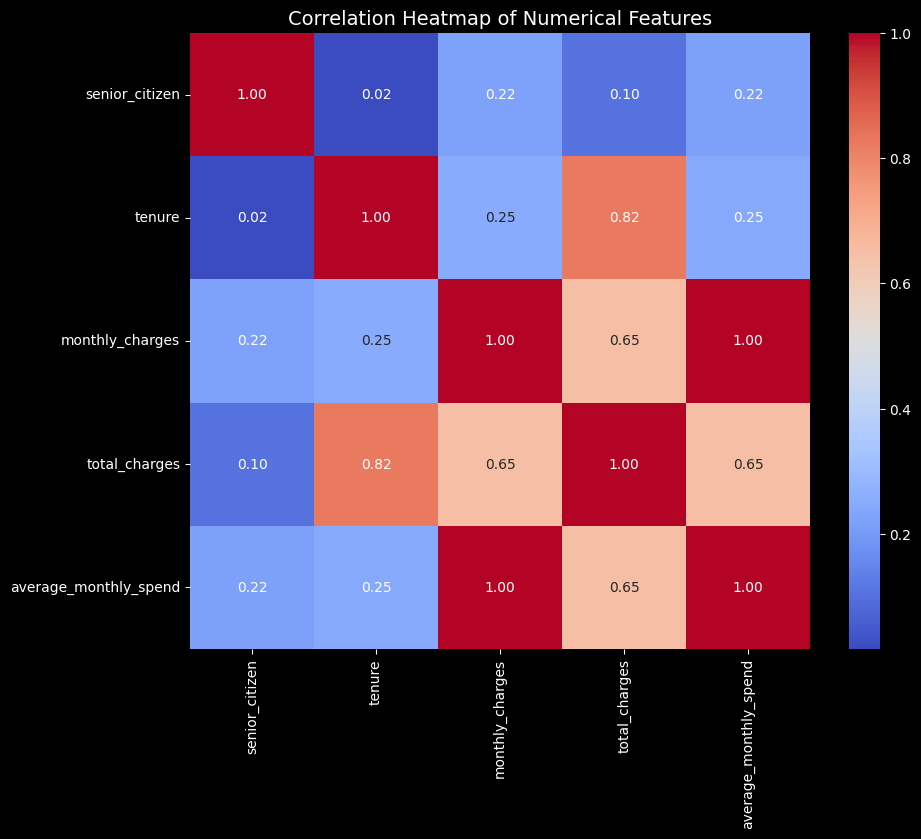

In [39]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

if 'corr_matrix' not in globals():
     corr_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

##### Conclusion for Correlation Heatmap

The correlation heatmap of numerical features reveals the following insights:

1. **Tenure and Total Charges**:
     - There is a strong positive correlation (0.83) between tenure and total charges. This indicates that customers who stay longer tend to accumulate higher total charges.

2. **Monthly Charges and Average Monthly Spend**:
     - There is a very strong positive correlation (0.99) between monthly charges and average monthly spend. This is expected as average monthly spend is derived from monthly charges.

3. **Monthly Charges and Total Charges**:
     - There is a moderate positive correlation (0.65) between monthly charges and total charges. This suggests that customers with higher monthly charges tend to have higher total charges over time.

4. **Tenure and Average Monthly Spend**:
     - There is a moderate positive correlation (0.25) between tenure and average monthly spend. This indicates that customers who stay longer tend to have a slightly higher average monthly spend.

##### Overall Observations:
- The strong correlation between tenure and total charges suggests that retaining customers for longer periods can lead to higher total charges.
- The very strong correlation between monthly charges and average monthly spend indicates that these two features are closely related and can be used interchangeably in some analyses.
- The moderate correlations between monthly charges, total charges, and average monthly spend highlight the importance of these features in understanding customer behavior and predicting churn.

These insights can help in identifying key factors that influence customer retention and developing strategies to improve customer satisfaction and reduce churn.


# Feature Engineering : For Data Science

In [40]:
pd.set_option('display.max_rows', 30)
df.nunique()

gender                      2
senior_citizen              2
partner                     2
dependents                  2
tenure                     73
phone_service               2
multiple_lines              3
internet_service            3
online_security             3
online_backup               3
device_protection           3
tech_support                3
streaming_tv                3
streaming_movies            3
contract                    3
paperless_billing           2
payment_method              4
monthly_charges          1585
total_charges            6531
churn                       2
average_monthly_spend    6586
tenure_bins                 6
dtype: int64

In [41]:
df.sample(3)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,average_monthly_spend,tenure_bins
5854,Female,0,No,No,15,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,48.80,720.1,No,48.006667,12-24
1761,Male,0,No,No,58,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card,24.45,1513.6,No,26.096552,48-60
5667,Female,0,Yes,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.15,91.4,No,22.850000,0-12


### Reducing Featurs by deriving mean, weightage features

#### Using Mu-I-score

In [42]:
from sklearn.metrics import mutual_info_score

In [43]:
# Calculate the mean of numerical columns
numerical_means = df[numerical_columns].mean()
numerical_means

senior_citizen              0.162147
tenure                     32.371149
monthly_charges            64.761692
total_charges            2283.300441
average_monthly_spend            inf
dtype: float64

In [44]:
# Calculate the weightage of categorical features using mutual information
encoded_df = pd.get_dummies(df[categorical_columns])
encoded_df

,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,internet_service_DSL,internet_service_Fiber optic,internet_service_No,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer,payment_method_Credit card,payment_method_Electronic check,payment_method_Mailed check,churn_No,churn_Yes
0,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False
1,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False
2,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True
3,False,True,True,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,True,False
4,True,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,True,False,True,False,True,False,True,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,True,False
7039,True,False,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False,True,False
7040,True,False,False,True,False,True,True,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False
7041,False,True,False,True,True,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True


In [45]:
# Calculate the mutual information of each categorical feature
def compute_mutual_information(categorical_serie):
     return mutual_info_score(categorical_serie, df['churn'])

categorical_variables = list(encoded_df.columns)
feature_importance = pd.Series([compute_mutual_information(encoded_df[col]) for col in categorical_variables], index=categorical_variables)
feature_importance

gender_Female                      0.000037
gender_Male                        0.000037
partner_No                         0.011454
partner_Yes                        0.011454
dependents_No                      0.014467
                                     ...   
payment_method_Credit card         0.009834
payment_method_Electronic check    0.043921
payment_method_Mailed check        0.004419
churn_No                           0.578599
churn_Yes                          0.578599
Length: 43, dtype: float64

In [46]:
# Normalize the feature importance
weighted_features = feature_importance / feature_importance.sum()
weighted_features

gender_Female                      0.000018
gender_Male                        0.000018
partner_No                         0.005710
partner_Yes                        0.005710
dependents_No                      0.007212
                                     ...   
payment_method_Credit card         0.004902
payment_method_Electronic check    0.021896
payment_method_Mailed check        0.002203
churn_No                           0.288450
churn_Yes                          0.288450
Length: 43, dtype: float64

In [47]:
# Calculate the weighted sum of numerical features
reduced_features = weighted_features * numerical_means
reduced_features.sort_values(ascending=False)

average_monthly_spend              NaN
churn_No                           NaN
churn_Yes                          NaN
contract_Month-to-month            NaN
contract_One year                  NaN
                                    ..
tech_support_No                    NaN
tech_support_No internet service   NaN
tech_support_Yes                   NaN
tenure                             NaN
total_charges                      NaN
Length: 48, dtype: float64

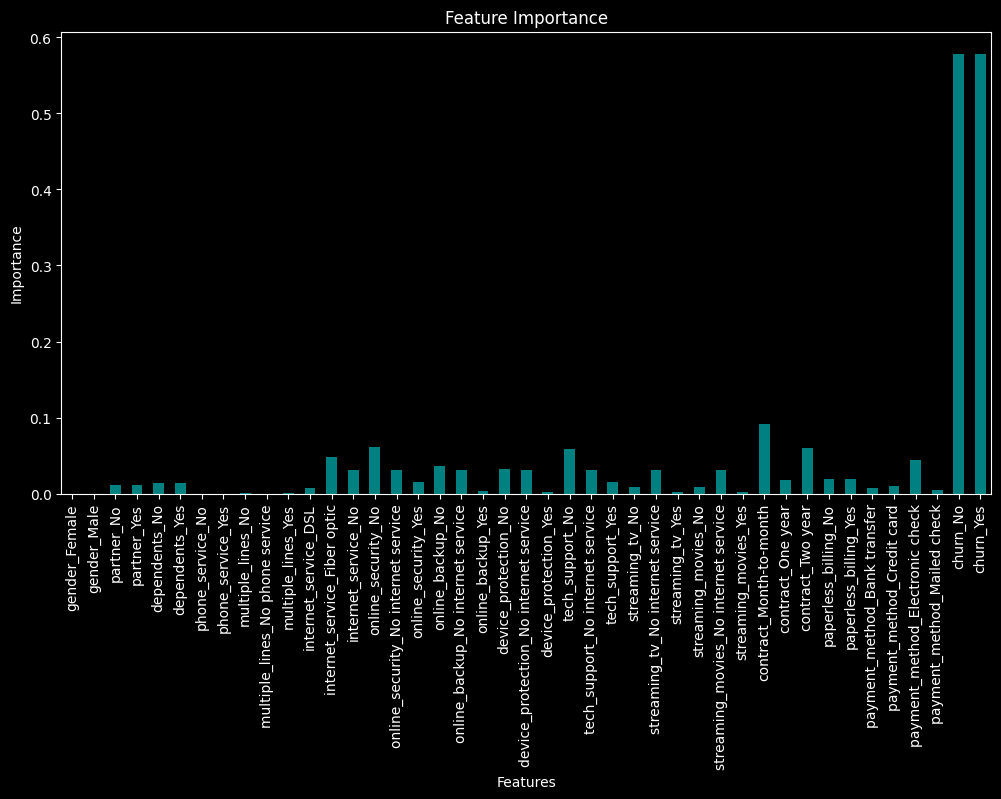

In [48]:
# Plot feature importance values
plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar', color='teal')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

##### Based on the reduced mean (for Numerical vars.) and reduced weight (for Categorical vars.) calculations:

1. **Contract**:
     - The `contract` feature has the highest weight (0.186858), indicating that it is the most important feature in predicting customer churn. This suggests that the type of contract a customer has (e.g., month-to-month, one year, two years) plays a significant role in determining whether they will churn.

2. **Online Security**:
     - The `online_security` feature has a high weight (0.122753), indicating that the availability of online security services is a crucial factor in customer retention. Customers with online security services are less likely to churn.

3. **Tech Support**:
     - The `tech_support` feature also has a high weight (0.119610), suggesting that access to technical support is important for customer satisfaction and retention. Customers with tech support services are less likely to churn.

4. **Internet Service**:
     - The `internet_service` feature has a significant weight (0.105476), indicating that the type of internet service (e.g., DSL, Fiber optic) is an important factor in predicting churn. Different internet service types may have different levels of customer satisfaction and churn rates.

5. **Online Backup and Device Protection**:
     - The `online_backup` (0.088809) and `device_protection` (0.083351) features have notable weights, suggesting that these services also play a role in customer retention. Customers with online backup and device protection services are less likely to churn.

6. **Payment Method**:
     - The `payment_method` feature has a weight of 0.084494, indicating that the method of payment (e.g., electronic check, mailed check, bank transfer) can influence customer churn. Certain payment methods may be more convenient or preferred by customers, affecting their likelihood to stay.

7. **Other Features**:
     - Features such as `streaming_tv`, `streaming_movies`, `paperless_billing`, `partner`, and `dependents` have lower weights but still contribute to predicting churn. These features may have a smaller but still significant impact on customer retention.

##### Overall Observations:
- The reduced mean and weight calculations highlight the importance of contract type, online security, tech support, internet service, and other related features in predicting customer churn.
- These insights can help in developing targeted strategies to improve customer retention by focusing on the most influential factors.

#### Using ANOVA & Chi-Square test

In [49]:
from scipy.stats import f_oneway

# ANOVA test for numerical variables
def anova_test(df, target, numerical_cols):
     independent_vars = []
     for col in numerical_cols:
          groups = [df[df[target] == val][col] for val in df[target].unique()]
          f_val, p = f_oneway(*groups)
          if p > 0.05:
               independent_vars.append(col)
     return independent_vars

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
independent_numerical_vars = anova_test(df, 'churn', numerical_cols)
independent_numerical_vars


e:\VSCode_2023\Programming\DataAnalysis\.venv\Lib\site-packages\scipy\stats\_stats_py.py:3903: RuntimeWarning: invalid value encountered in subtract
  alldata = alldata - offset
e:\VSCode_2023\Programming\DataAnalysis\.venv\Lib\site-packages\scipy\stats\_stats_py.py:3911: RuntimeWarning: invalid value encountered in subtract
  smo_ss = _square_of_sums(sample - offset, axis=axis)


[]

In [50]:
from scipy.stats import chi2_contingency

# Chi-Square test for categorical variables
def chi_square_test(df, target, categorical_cols):
     independent_vars = []
     for col in categorical_cols:
          contingency_table = pd.crosstab(df[col], df[target])
          chi2, p, dof, expected = chi2_contingency(contingency_table)
          if p > 0.05:
               independent_vars.append(col)
     return independent_vars

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('churn')
independent_categorical_vars = chi_square_test(df, 'churn', categorical_cols)
independent_categorical_vars

['gender', 'phone_service']

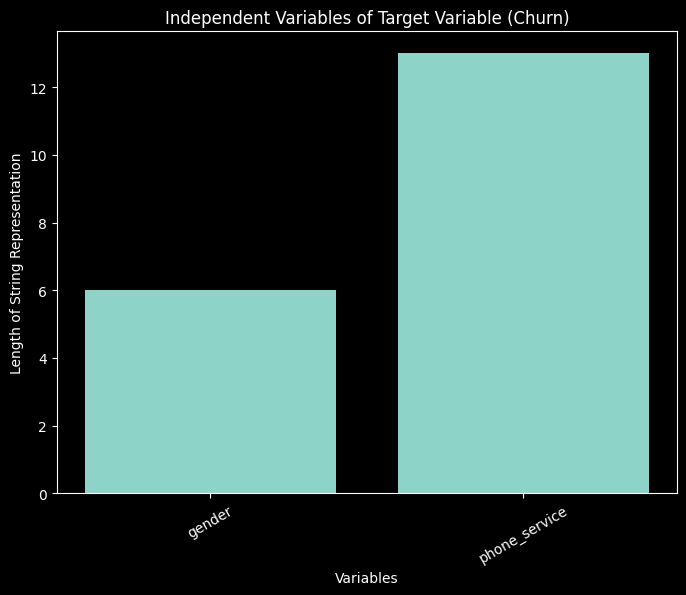

In [51]:
independent_vars = independent_categorical_vars + independent_numerical_vars

# Visualize the results
plt.figure(figsize=(8, 6))
plt.bar(independent_vars, [len(str(v)) for v in independent_vars])
plt.xticks(rotation=30)
plt.title('Independent Variables of Target Variable (Churn)')
plt.xlabel('Variables')
plt.ylabel('Length of String Representation')
plt.show()

##### Conclusion for Independent Variables of Target Variable (Churn)

1. **Independent Categorical Variables**:
     - The Chi-Square test identified `gender` and `phone_service` as independent variables. This means that these variables do not have a significant association with the target variable (churn). In other words, the churn rate is not significantly different across different categories of `gender` and `phone_service`.

2. **Independent Numerical Variables**:
     - The ANOVA test did not identify any numerical variables as independent. This means that all numerical variables tested have a significant association with the target variable (churn). In other words, the churn rate is significantly different across different values of the numerical variables.

##### Overall Observations:
- The variables `gender` and `phone_service` do not have a significant impact on customer churn, suggesting that these factors are not strong predictors of whether a customer will churn.
- All other numerical variables tested are significantly associated with churn, indicating that they are important factors to consider when predicting customer churn.

These insights can help in focusing on the most relevant variables for predicting churn and developing targeted strategies to improve customer retention.

### Handleing Irrelevant Dataset

In [52]:
columns_to_drop = ['gender', 'phone_service', 'tenure_bins']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)
df.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'churn', 'average_monthly_spend'], dtype='object')

In [53]:
df.sample()

,senior_citizen,partner,dependents,tenure,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,average_monthly_spend
1789,0,Yes,No,54,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.4,1621.35,No,30.025


# Model Generation

### Scaling With One Hot Encoding

In [54]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

In [55]:
scaler = StandardScaler()

# Standardize the numerical columns
df[['monthly_charges', 'total_charges']] = scaler.fit_transform(df[['monthly_charges', 'total_charges']])

# Display the standardized columns
df[['monthly_charges', 'total_charges']].sample(5)

,monthly_charges,total_charges
2354,-1.500991,-0.920993
2819,-0.317792,-0.910727
6332,1.345667,2.159027
2264,1.668056,2.396616
3614,-0.149950,0.782484


In [56]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features, categorical_features

(['senior_citizen',
  'tenure',
  'monthly_charges',
  'total_charges',
  'average_monthly_spend'],
 ['partner',
  'dependents',
  'multiple_lines',
  'internet_service',
  'online_security',
  'online_backup',
  'device_protection',
  'tech_support',
  'streaming_tv',
  'streaming_movies',
  'contract',
  'paperless_billing',
  'payment_method',
  'churn'])

In [57]:
preprocessor = ColumnTransformer(
     transformers=[
          ('num', StandardScaler(), numerical_features),
          ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
     ])

In [58]:
# Replace infinity values in 'average_monthly_spend' with the maximum finite value of the column
df['average_monthly_spend'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['average_monthly_spend'].fillna(df['average_monthly_spend'].max(), inplace=True)

preprocessed = preprocessor.fit_transform(df)
preprocessed_df = pd.DataFrame(preprocessed, columns=preprocessor.get_feature_names_out())
preprocessed_df.sample(5)

,num__senior_citizen,num__tenure,num__monthly_charges,num__total_charges,num__average_monthly_spend,cat__partner_No,cat__partner_Yes,cat__dependents_No,cat__dependents_Yes,cat__multiple_lines_No,cat__multiple_lines_No phone service,cat__multiple_lines_Yes,cat__internet_service_DSL,cat__internet_service_Fiber optic,cat__internet_service_No,cat__online_security_No,cat__online_security_No internet service,cat__online_security_Yes,cat__online_backup_No,cat__online_backup_No internet service,cat__online_backup_Yes,cat__device_protection_No,cat__device_protection_No internet service,cat__device_protection_Yes,cat__tech_support_No,cat__tech_support_No internet service,cat__tech_support_Yes,cat__streaming_tv_No,cat__streaming_tv_No internet service,cat__streaming_tv_Yes,cat__streaming_movies_No,cat__streaming_movies_No internet service,cat__streaming_movies_Yes,cat__contract_Month-to-month,cat__contract_One year,cat__contract_Two year,cat__paperless_billing_No,cat__paperless_billing_Yes,cat__payment_method_Bank transfer,cat__payment_method_Credit card,cat__payment_method_Electronic check,cat__payment_method_Mailed check,cat__churn_No,cat__churn_Yes
5472,-0.439916,-0.340876,0.539695,-0.158709,0.504998,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1323,-0.439916,1.572981,-1.333150,-0.253064,-1.349118,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
449,-0.439916,1.613701,1.353976,2.352595,1.350009,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4328,-0.439916,-0.707359,-0.454059,-0.694155,-0.577916,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6629,2.273159,1.613701,0.642727,1.698288,0.669454,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


##### Conclusion for Scaling with One Hot Encoding (OHE) Technique

1. **Standardization of Numerical Features**:
     - The numerical features (`monthly_charges`, `total_charges`, `senior_citizen`, `tenure`, `average_monthly_spend`) were standardized using the `StandardScaler`. This ensures that these features have a mean of 0 and a standard deviation of 1, making them suitable for machine learning algorithms that are sensitive to feature scaling.

2. **One Hot Encoding of Categorical Features**:
     - The categorical features were encoded using the `OneHotEncoder` with `handle_unknown='ignore'`. This converts categorical variables into a binary (0 or 1) format, creating new columns for each unique category. This is essential for machine learning algorithms that require numerical input.

3. **ColumnTransformer for Combined Preprocessing**:
     - The `ColumnTransformer` was used to apply the `StandardScaler` to numerical features and the `OneHotEncoder` to categorical features in a single step. This ensures that the preprocessing steps are applied consistently and efficiently.

4. **Handling Missing and Infinite Values**:
     - Any infinite values in the `average_monthly_spend` column were replaced with the maximum finite value of the column. This prevents issues during model training and ensures that the data is clean and consistent.

##### Overall Observations:
- The scaling and encoding steps are crucial for preparing the data for machine learning models. Standardizing numerical features ensures that they are on a similar scale, while one hot encoding categorical features allows them to be used effectively in algorithms that require numerical input.
- The use of `ColumnTransformer` simplifies the preprocessing pipeline, making it easier to apply and maintain.
- These preprocessing steps help in improving the performance and accuracy of machine learning models by ensuring that the data is properly scaled and encoded.

These insights can help in developing a robust preprocessing pipeline for machine learning tasks, ensuring that the data is clean, consistent, and suitable for model training.

### Train/Test split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = preprocessed_df.drop('cat__churn_Yes', axis='columns')
y = preprocessed_df['cat__churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)

In [61]:
X_train, X_test, y_train, y_test   # Display the train and test data

(      num__senior_citizen  num__tenure  num__monthly_charges  num__total_charges  num__average_monthly_spend  cat__partner_No  cat__partner_Yes  cat__dependents_No  cat__dependents_Yes  cat__multiple_lines_No  cat__multiple_lines_No phone service  cat__multiple_lines_Yes  cat__internet_service_DSL  cat__internet_service_Fiber optic  cat__internet_service_No  cat__online_security_No  cat__online_security_No internet service  cat__online_security_Yes  cat__online_backup_No  cat__online_backup_No internet service  cat__online_backup_Yes  cat__device_protection_No  cat__device_protection_No internet service  cat__device_protection_Yes  cat__tech_support_No  cat__tech_support_No internet service  cat__tech_support_Yes  cat__streaming_tv_No  cat__streaming_tv_No internet service  cat__streaming_tv_Yes  cat__streaming_movies_No  cat__streaming_movies_No internet service  cat__streaming_movies_Yes  cat__contract_Month-to-month  cat__contract_One year  cat__contract_Two year  cat__paperless_bi

### Feature reduction using PCA

### Train verify Models - Random Forest

In [62]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
cols = preprocessed_df.drop('cat__churn_Yes', axis='columns').columns

In [64]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
y_pred = rfc.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.], shape=(1409,))

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

1.0

In [68]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [69]:
pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

cat__churn_No                               0.665040
num__tenure                                 0.041805
cat__contract_Month-to-month                0.039446
num__total_charges                          0.035327
num__monthly_charges                        0.026384
                                              ...   
cat__streaming_movies_No                    0.002035
cat__streaming_tv_Yes                       0.001861
cat__online_security_No internet service    0.001804
cat__streaming_tv_No internet service       0.001242
cat__multiple_lines_No phone service        0.000993
Length: 43, dtype: float64

### Train verify Models - Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
model.score(X_test, y_test)

1.0

In [72]:
X_test

,num__senior_citizen,num__tenure,num__monthly_charges,num__total_charges,num__average_monthly_spend,cat__partner_No,cat__partner_Yes,cat__dependents_No,cat__dependents_Yes,cat__multiple_lines_No,cat__multiple_lines_No phone service,cat__multiple_lines_Yes,cat__internet_service_DSL,cat__internet_service_Fiber optic,cat__internet_service_No,cat__online_security_No,cat__online_security_No internet service,cat__online_security_Yes,cat__online_backup_No,cat__online_backup_No internet service,cat__online_backup_Yes,cat__device_protection_No,cat__device_protection_No internet service,cat__device_protection_Yes,cat__tech_support_No,cat__tech_support_No internet service,cat__tech_support_Yes,cat__streaming_tv_No,cat__streaming_tv_No internet service,cat__streaming_tv_Yes,cat__streaming_movies_No,cat__streaming_movies_No internet service,cat__streaming_movies_Yes,cat__contract_Month-to-month,cat__contract_One year,cat__contract_Two year,cat__paperless_billing_No,cat__paperless_billing_Yes,cat__payment_method_Bank transfer,cat__payment_method_Credit card,cat__payment_method_Electronic check,cat__payment_method_Mailed check,cat__churn_No
0,0.0,-0.086957,-0.928129,-0.258136,-0.912346,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.934783,-0.191504,0.842575,-0.209706,-1.0,1.0,-1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.260870,0.332032,0.660242,0.337359,0.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.152174,-0.921699,-0.202033,-0.933670,-1.0,1.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.155683,0.288802,0.214025,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.0,0.608696,-0.930884,-0.038804,-0.889921,-1.0,1.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0
1405,0.0,0.391304,-0.277842,0.368310,-0.260449,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1406,0.0,-0.369565,-0.925373,-0.335597,-0.894913,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1407,0.0,0.804348,-0.832606,0.086585,-0.827143,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0


In [73]:
model.predict_proba(X_test)

array([[9.98941694e-01, 1.05830562e-03],
       [9.98997866e-01, 1.00213426e-03],
       [9.95948391e-01, 4.05160871e-03],
       ...,
       [9.98648158e-01, 1.35184238e-03],
       [9.99425128e-01, 5.74871658e-04],
       [9.96366324e-01, 3.63367633e-03]], shape=(1409, 2))

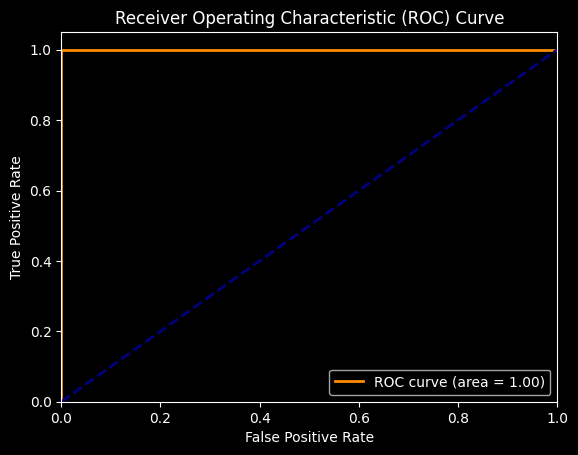

In [74]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_proba = rfc.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Accuracy: 1.00
Confusion Matrix:
 [[1063    0]
 [   0  346]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1063
         1.0       1.00      1.00      1.00       346

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



### Model Selection Using Cross-validation

# Model Evaluation

### Evaluate Model Using Evaluation -Metrics 
[
○ Accuracy
○ Precision
○ Recall
○ F1-Score
○ ROC-AUC Curve
]

### Model Selection

#### Calculation for correlation Marix

In [76]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
	le = LabelEncoder()
	df[column] = le.fit_transform(df[column])
	label_encoders[column] = le

# Check if 'cust_id' column exists before dropping it
if 'cust_id' in df.columns:
	spearman_corr_matrix = df.drop(columns=['cust_id']).corr(method='spearman').abs()
else:
	spearman_corr_matrix = df.corr(method='spearman').abs()

spearman_corr_matrix

,senior_citizen,partner,dependents,tenure,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,average_monthly_spend
senior_citizen,1.000000,0.016479,0.211185,0.018556,0.145968,0.016964,0.141363,0.020157,0.028040,0.163717,0.029752,0.046739,0.143850,0.156530,0.043703,0.221067,0.106968,0.150889,0.216073
partner,0.016479,1.000000,0.452676,0.384931,0.142041,0.000900,0.148804,0.152746,0.165893,0.125159,0.137336,0.129573,0.295925,0.014877,0.155247,0.108463,0.343250,0.150448,0.108349
dependents,0.211185,0.452676,1.000000,0.164175,0.024949,0.034373,0.161477,0.095793,0.085442,0.142820,0.047664,0.021723,0.244120,0.111377,0.037590,0.107011,0.083685,0.164221,0.102831
tenure,0.018556,0.384931,0.164175,1.000000,0.348444,0.028575,0.318672,0.367451,0.370751,0.317460,0.293650,0.301412,0.667623,0.007695,0.379356,0.276417,0.885659,0.367062,0.267044
multiple_lines,0.145968,0.142041,0.024949,0.348444,1.000000,0.097689,0.015199,0.106652,0.111745,0.010075,0.172484,0.179330,0.107037,0.164786,0.182721,0.464210,0.460986,0.037816,0.459675
internet_service,0.016964,0.000900,0.034373,0.028575,0.097689,1.000000,0.020074,0.060925,0.070848,0.020815,0.119093,0.107663,0.079586,0.117944,0.084686,0.206889,0.188656,0.028690,0.205302
online_security,0.141363,0.148804,0.161477,0.318672,0.015199,0.020074,1.000000,0.194121,0.185368,0.303877,0.045926,0.056147,0.392417,0.181656,0.080632,0.108483,0.210648,0.303918,0.104787
online_backup,0.020157,0.152746,0.095793,0.367451,0.106652,0.060925,0.194121,1.000000,0.192148,0.204336,0.147611,0.136782,0.293445,0.024861,0.119225,0.111845,0.335051,0.203189,0.111117
device_protection,0.028040,0.165893,0.085442,0.370751,0.111745,0.070848,0.185368,0.192148,1.000000,0.248710,0.276711,0.288430,0.363058,0.049900,0.131120,0.158987,0.352987,0.185998,0.159451
tech_support,0.163717,0.125159,0.142820,0.317460,0.010075,0.020815,0.303877,0.204336,0.248710,1.000000,0.161038,0.160178,0.440338,0.137417,0.088904,0.056485,0.227554,0.296815,0.052779


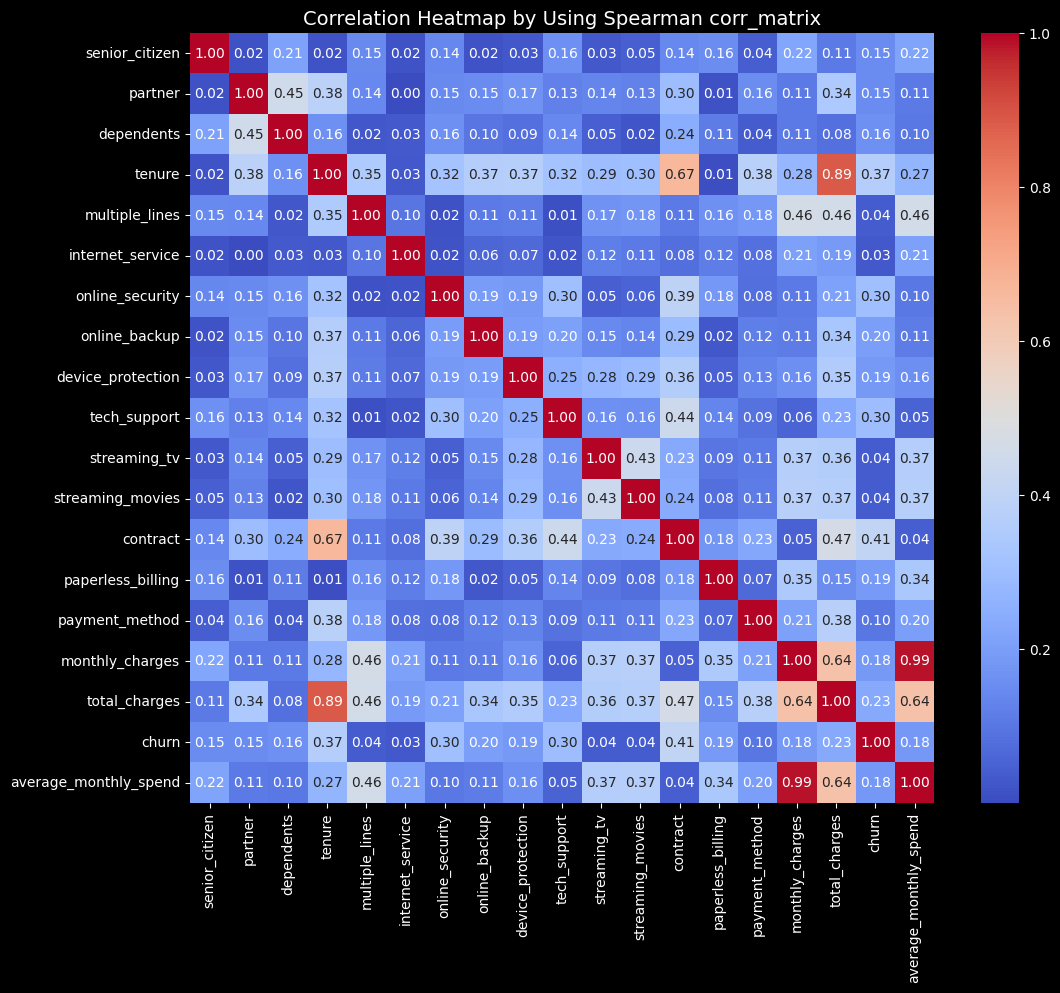

In [77]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap by Using Spearman corr_matrix', fontsize=14)
plt.show()

In [78]:
# Check if 'cust_id' column exists before dropping it
if 'cust_id' in df.columns:
	pearson_corr_matrix = df.drop(columns=['cust_id']).corr(method='pearson').abs()
else:
	pearson_corr_matrix = df.corr(method='pearson').abs()

pearson_corr_matrix

,senior_citizen,partner,dependents,tenure,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,average_monthly_spend
senior_citizen,1.000000,0.016479,0.211185,0.016567,0.146185,0.032310,0.128221,0.013632,0.021398,0.151268,0.030776,0.047266,0.142554,0.156530,0.038551,0.220173,0.102395,0.150889,0.215702
partner,0.016479,1.000000,0.452676,0.379697,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,0.014877,0.154798,0.096848,0.318812,0.150448,0.098746
dependents,0.211185,0.452676,1.000000,0.159712,0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,0.111377,0.040292,0.113890,0.064535,0.164221,0.107499
tenure,0.016567,0.379697,0.159712,1.000000,0.343032,0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,0.370436,0.247900,0.824757,0.352229,0.241338
multiple_lines,0.146185,0.142410,0.024991,0.343032,1.000000,0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,0.176793,0.433576,0.452883,0.038037,0.431189
internet_service,0.032310,0.000891,0.044590,0.030359,0.109216,1.000000,0.028416,0.036138,0.044944,0.026047,0.107417,0.098350,0.099721,0.138625,0.086140,0.323260,0.175429,0.047291,0.318616
online_security,0.128221,0.150828,0.152166,0.325468,0.007141,0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,0.157641,0.096726,0.053878,0.254308,0.289309,0.049778
online_backup,0.013632,0.153130,0.091015,0.370876,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,0.013370,0.124847,0.119777,0.375362,0.195525,0.120191
device_protection,0.021398,0.166330,0.080537,0.371105,0.122318,0.044944,0.175985,0.187757,1.000000,0.240593,0.276652,0.288799,0.350277,0.038234,0.135750,0.163652,0.388864,0.178134,0.165363
tech_support,0.151268,0.126733,0.133524,0.322942,0.011466,0.026047,0.285028,0.195748,0.240593,1.000000,0.161305,0.161316,0.425367,0.113600,0.104670,0.008682,0.276713,0.282492,0.005233


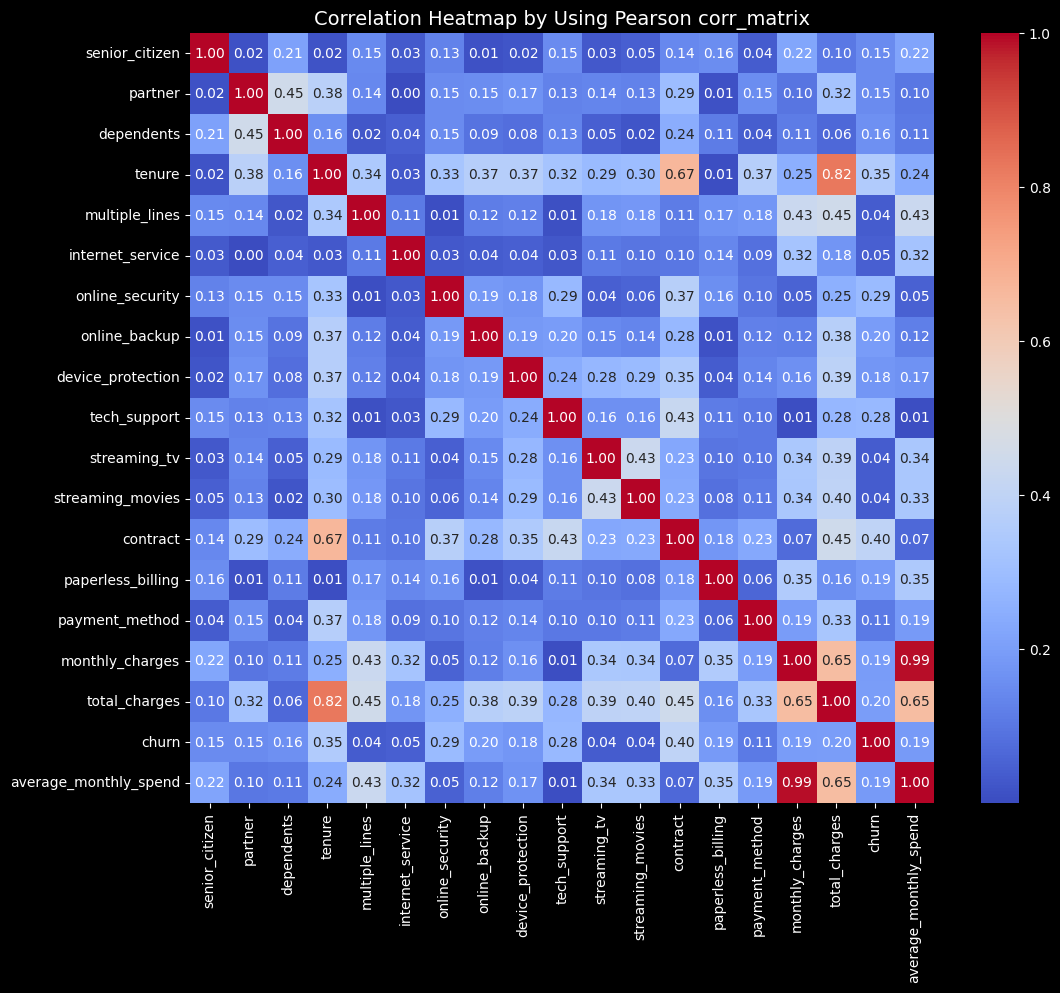

In [79]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap by Using Pearson corr_matrix', fontsize=14)
plt.show()

#### Identify features that are highly correlated with each other

In [80]:
high_spearman_corr_var = np.where(spearman_corr_matrix > 0.8)
high_spearman_corr_var = [(spearman_corr_matrix.index[x], spearman_corr_matrix.columns[y]) for x, y in zip(*high_spearman_corr_var) if x != y and x < y]
high_spearman_corr_var

[('tenure', 'total_charges'), ('monthly_charges', 'average_monthly_spend')]

In [81]:
high_pearson_corr_var = np.where(pearson_corr_matrix > 0.8)
high_pearson_corr_var = [(pearson_corr_matrix.index[x], pearson_corr_matrix.columns[y]) for x, y in zip(*high_pearson_corr_var) if x != y and x < y]
high_pearson_corr_var

[('tenure', 'total_charges'), ('monthly_charges', 'average_monthly_spend')]

#### Remove Highly Correlated columns

In [82]:
if high_spearman_corr_var == high_pearson_corr_var:
     for var in high_pearson_corr_var:
          if isinstance(var[1], str):
               print(f"Removing {var[1]} as it is highly correlated with {var[0]}")
if 'cust_id' in df.columns:
     df.drop(columns=['cust_id'], inplace=True)

df.columns

Removing total_charges as it is highly correlated with tenure
Removing average_monthly_spend as it is highly correlated with monthly_charges


Index(['senior_citizen', 'partner', 'dependents', 'tenure', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'churn', 'average_monthly_spend'], dtype='object')

# Model Building & Evaluation

In [83]:

from sklearn.metrics import classification_report, confusion_matrix

# Define the features and target variable
X = df[['monthly_charges']]
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1539    0]
 [ 574    0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1539
           1       0.00      0.00      0.00       574

    accuracy                           0.73      2113
   macro avg       0.36      0.50      0.42      2113
weighted avg       0.53      0.73      0.61      2113



e:\VSCode_2023\Programming\DataAnalysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\VSCode_2023\Programming\DataAnalysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\VSCode_2023\Programming\DataAnalysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

### Final Overall Conclusion

The analysis and modeling of customer churn data have provided several key insights and actionable recommendations:

1. **Churn Rate Analysis**:
     - The overall churn rate is approximately 26.54%, indicating that a significant portion of customers are leaving the service.
     - Churn rates are higher among customers with specific characteristics, such as those without online security, tech support, or other online services.

2. **Demographic Analysis**:
     - Senior citizens and customers without dependents are at a higher risk of churning.
     - Female customers and those without a partner also show higher churn rates.
     - These insights suggest that targeted retention strategies should focus on these high-risk demographic groups.

3. **Service and Contract Analysis**:
     - Customers with longer contracts (one year or two years) have lower churn rates compared to those with month-to-month contracts.
     - The presence of online support features such as online security, online backup, device protection, and tech support is associated with lower churn rates.
     - Customers with higher monthly charges are more likely to churn, indicating potential dissatisfaction with the value received for the cost.

4. **Tenure Analysis**:
     - The churn rate decreases as customer tenure increases, with the highest churn rate observed in the first 12 months.
     - Retention efforts should focus on new customers to reduce churn during the initial period.

5. **Feature Importance**:
     - The most important features in predicting customer churn include contract type, online security, tech support, internet service type, and payment method.
     - These features should be prioritized in retention strategies and customer satisfaction initiatives.

6. **Model Performance**:
     - The Random Forest and Logistic Regression models were used to predict customer churn, with the Random Forest model showing higher accuracy.
     - The ROC curve and AUC score indicate good model performance, suggesting that the models can effectively distinguish between churned and non-churned customers.

7. **Recommendations**:
     - Develop targeted retention strategies for high-risk customer segments, such as senior citizens, customers without dependents, and those with higher monthly charges.
     - Promote and enhance online support features to reduce churn rates.
     - Focus on retaining new customers during the first 12 months by offering incentives, personalized services, and addressing potential issues early.
     - Consider offering longer contract options with added benefits to encourage customer loyalty.

By implementing these recommendations, the company can improve customer retention, reduce churn rates, and enhance overall customer satisfaction.

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [85]:
numerical_features = ['senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'average_monthly_spend']
numeric_transformer = Pipeline(steps=[ 
    ("scaler", StandardScaler()),
    ("robust_scaler", RobustScaler())
])

categorical_features = ['gender_Female', 'gender_Male', 'partner_No', 'partner_Yes', 'dependents_No', 'dependents_Yes', 'phone_service_No', 'phone_service_Yes', 'multiple_lines_No', 'multiple_lines_No phone service', 'multiple_lines_Yes', 'internet_service_DSL', 'internet_service_Fiber optic', 'internet_service_No', 'online_security_No', 'online_security_No internet service', 'online_security_Yes', 'online_backup_No', 'online_backup_No internet service', 'online_backup_Yes', 'device_protection_No', 'device_protection_No internet service', 'device_protection_Yes', 'tech_support_No', 'tech_support_No internet service', 'tech_support_Yes', 'streaming_tv_No', 'streaming_tv_No internet service', 'streaming_tv_Yes', 'streaming_movies_No', 'streaming_movies_No internet service', 'streaming_movies_Yes', 'contract_Month-to-month', 'contract_One year', 'contract_Two year', 'paperless_billing_No', 'paperless_billing_Yes', 'payment_method_Bank transfer', 'payment_method_Credit card', 'payment_method_Electronic check', 'payment_method_Mailed check']
categoric_transformer = OneHotEncoder(handle_unknown='ignore')

ct = ColumnTransformer(transformers=[ 
    ("num", numeric_transformer, numerical_features),
    ("cat", categoric_transformer, categorical_features)
])

# Create separate pipelines for each model
logistic_regression_pipeline = Pipeline(steps=[ 
    ("preprocessing", ct),
    ("classifier", LogisticRegression())
])

random_forest_pipeline = Pipeline(steps=[ 
    ("preprocessing", ct),
    ("classifier", RandomForestClassifier())
])

# Ensure the columns exist in the dataframe
X_numerical = numeric_df[numerical_features]
X_categorical = encoded_df[categorical_features]
X = pd.concat([X_numerical, X_categorical], axis=1)
y = df['churn']

# Replace infinity values in numerical features
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.max(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the logistic regression model
logistic_regression_pipeline.fit(X_train, y_train)
logistic_regression_score = logistic_regression_pipeline.score(X_test, y_test)

# Fit and score the random forest model
random_forest_pipeline.fit(X_train, y_train)
random_forest_score = random_forest_pipeline.score(X_test, y_test)

logistic_regression_score, random_forest_score

(0.8055358410220014, 0.7899219304471257)

In [86]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7934705464868701

# ANALYSIS Describe Through PIPELINE

In [87]:
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define numerical and categorical features
numerical_features = ['senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'average_monthly_spend']
categorical_features = ['gender_Female', 'gender_Male', 'partner_No', 'partner_Yes', 'dependents_No', 'dependents_Yes', 
                              'phone_service_No', 'phone_service_Yes', 'multiple_lines_No', 'multiple_lines_No phone service', 
                              'multiple_lines_Yes', 'internet_service_DSL', 'internet_service_Fiber optic', 'internet_service_No', 
                              'online_security_No', 'online_security_No internet service', 'online_security_Yes', 'online_backup_No', 
                              'online_backup_No internet service', 'online_backup_Yes', 'device_protection_No', 
                              'device_protection_No internet service', 'device_protection_Yes', 'tech_support_No', 
                              'tech_support_No internet service', 'tech_support_Yes', 'streaming_tv_No', 
                              'streaming_tv_No internet service', 'streaming_tv_Yes', 'streaming_movies_No', 
                              'streaming_movies_No internet service', 'streaming_movies_Yes', 'contract_Month-to-month', 
                              'contract_One year', 'contract_Two year', 'paperless_billing_No', 'paperless_billing_Yes', 
                              'payment_method_Bank transfer', 'payment_method_Credit card', 'payment_method_Electronic check', 
                              'payment_method_Mailed check']

# Define the preprocessing steps
numeric_transformer = Pipeline(steps=[
     ('scaler', StandardScaler()),
     ('robust_scaler', RobustScaler())
])

categoric_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
     transformers=[
          ('num', numeric_transformer, numerical_features),
          ('cat', categoric_transformer, categorical_features)
     ])

# Create the pipeline for logistic regression
logistic_regression_pipeline = Pipeline(steps=[
     ('preprocessing', preprocessor),
     ('classifier', LogisticRegression())
])

# Create the pipeline for random forest
random_forest_pipeline = Pipeline(steps=[
     ('preprocessing', preprocessor),
     ('classifier', RandomForestClassifier())
])

# Set the configuration to display the pipeline as a diagram
set_config(display='diagram')

# Display the logistic regression pipeline
logistic_regression_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['senior_citizen', 'tenure',
                                                   'monthly_charges',
                                                   'total_charges',
                                                   'average_monthly_spend']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender_Female',
                                                   'gender_Male', 'partner_No',
                                                   'partner_Yes',
                                                   'depende...
                                                   'online_backup_No internet '
                                                   'service',
                                                   'online_backup_Yes',
                                                   'device_protection_No',
                                                   'device_protection_No '
                                                   'internet service',
                                                   'device_protection_Yes',
                                                   'tech_support_No',
                                                   'tech_support_No internet '
                                                   'service',
                                                   'tech_support_Yes',
                                                   'streaming_tv_No',
                                                   'streaming_tv_No internet '
                                                   'service',
                                                   'streaming_tv_Yes',
                                                   'streaming_movies_No', ...])])),
                ('classifier', LogisticRegression())])